In [194]:
#import swifter

import pandas as pd # our main data management package
import matplotlib.pyplot as plt # our main display package
import string # used for preprocessing
import re # used for preprocessing
import nltk # the Natural Language Toolkit, used for preprocessing
import numpy as np # used for managing NaNs
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
# filepath for tsv file
filepath = "in.tsv"

# loading tsv file as csv file
df = pd.read_csv("in.tsv", sep = '\t', header = None)

In [108]:
# expected csv file for validation 
df_or = pd.read_csv("expected-original.tsv", sep = " ", header = None)

In [160]:
df_or.head()

,0,1,2,3,4,5,6,7
0,address__post_town=OLDHAM,address__postcode=OL3_5DE,address__street_line=Delph_New_Road,charity_name=PC_NICOLA_HUGHES_MEMORIAL_FUND,charity_number=1156398,income_annually_in_british_pounds=103373.00,report_date=2016-04-29,spending_annually_in_british_pounds=43497.00
1,address__post_town=GAINSBOROUGH,address__postcode=DN21_3JZ,address__street_line=3_CHURCH_LANE,charity_name=STEPPING_STONE_THEATRE,charity_number=1165525,income_annually_in_british_pounds=17870.00,report_date=2017-03-31,spending_annually_in_british_pounds=15240.00
2,address__post_town=STAINES-UPON-THAMES[11],address__postcode=TW18_2AE,charity_name=ABILITY_HOUSING_ASSOCIATION,charity_number=271547,income_annually_in_british_pounds=13671352.00,report_date=2016-09-30,spending_annually_in_british_pounds=9314006.00,NaN
3,address__post_town=LONDON,address__postcode=W1A_1AA,address__street_line=Portland_Place,charity_name=BBC_MEDIA_ACTION,charity_number=1076235,income_annually_in_british_pounds=35389699.00,report_date=2018-03-31,spending_annually_in_british_pounds=35928170.00
4,address__post_town=NOTTINGHAM,address__postcode=NG2_4NB,address__street_line=38_ENA_AVENUE,charity_name=THE_GREENWAY_CENTRE,charity_number=702321,income_annually_in_british_pounds=107471.00,report_date=2014-03-31,spending_annually_in_british_pounds=93109.00


In [11]:
# headers for in.tsv

headers = ('filename',  'keys', 'text_djvu' 'text_tesseract', 'text_textract', 'text_best')

In [12]:
# adding headers to data
df.rename(columns={0:'filename',
                          1:'keys',
                          2:'text_djvu',
                        3:'text_tesseract',
                            4:'text_textract',
                            5:'text_best'}, 
                         inplace=True)

In [13]:
df.head(2)

,filename,keys,text_djvu,text_tesseract,text_textract,text_best
0,008482cf51383c158b54e593cfa5fbf7.pdf,address__post_town address__postcode address__...,TAR\n1\nAugust 2016\nTrustees' Annual Report f...,CHARITY Trustees’' Annual Report for the perio...,CHARITY\nTrustees' Annual Report for the perio...,TAR\n1\nAugust 2016\nTrustees' Annual Report f...
1,009fab39d746267b6de8428366fe4b02.pdf,address__post_town address__postcode address__...,"\fAnnual Report 2015-2017 July, 2017\nStepping...",\n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...,Charity Name\nNo lif anv)\nStepping Stone Thea...,\n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...


### Functions for cleaning data

In [14]:
# cleaning the dataset removing '\\n' from data 

df = df.replace(r'\\n',' ', regex=True)
 

In [15]:

def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

# make all text lowercase
def text_lowercase(text):
    return text.lower()

# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text

# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

# lemmatize
'''lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text'''

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    #text = lemmatize(text)
    text = ' '.join(text)
    return text

In [16]:
# calling the preprocessing function

text_train = [] # our preprocessed text column

for text_data in df['text_best']:
    pp_text_data = preprocessing(text_data)
    text_train.append(pp_text_data)

In [18]:
# replacing the preprocessed text as a column

df['text_best'] = text_train 

In [19]:
df['text_best'].head(2)

0    tar august trustees annual report period perio...
1    na anv oa el c qic c f receipts payments accou...
Name: text_best, dtype: object

### Vectorizing 

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer( max_df = 0.8, min_df = 0.2, stop_words={'english'})

#def vect(data)

X = vectorizer.fit_transform(df.text_best)

In [91]:
### one more approach for matrix

vectorizer = TfidfVectorizer( max_df = 0.8, min_df = 0.2,use_idf=True, ngram_range=(1,3), stop_words={'english'})


matrix = vectorizer.fit_transform(df.text_best)

In [93]:
matrix.shape

(1729, 2347)

### K - Means

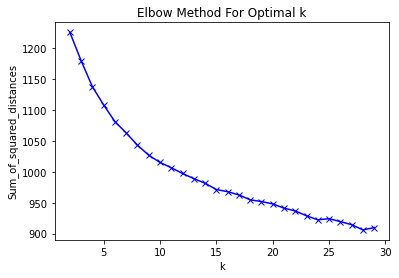

In [98]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

K = range(2,30)# taking a range of 30 for checking number of clusters

for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)

   km = km.fit(matrix)
    
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [100]:
### from above graph we number of cluster as 28

n_cluster = 28

model = KMeans(n_clusters=n_cluster, init='k-means++', max_iter=200, n_init=10)

model.fit(matrix)

labels=model.labels_


'''

for i,k in enumerate([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]):
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    # Run the kmeans algorithm
    model = KMeans(n_clusters=k,  )
    y_predict = km.fit_predict(X)
    centroids  = km.cluster_centers_

'''



'\n\nfor i,k in enumerate([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]):\n    \n    fig, ax = plt.subplots(1,2,figsize=(15,5))\n    \n    # Run the kmeans algorithm\n    model = KMeans(n_clusters=k,  )\n    y_predict = km.fit_predict(X)\n    centroids  = km.cluster_centers_\n\n'

In [137]:
labels.shape # checking the shape of labels 

(1729,)

### For checking words in each cluster

In [102]:
from sklearn.cluster import KMeans

order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

In [103]:
# checking words with most occurance
for i in range(n_cluster):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 company
 limited guarantee
 company limited guarantee
 guarantee
 company limited
 financial statements
 companies
 directors
 march
 total funds
Cluster 1:
 note
 notes accounts
 last year
 investments
 grants
 value
 period
 last
 sofa
 name
Cluster 2:
 church
 community
 people
 youth
 receipts
 mission
 work
 examination
 examiner
 children
Cluster 3:
 research
 financial statements
 march
 society
 health
 company
 uk
 investments
 people
 new
Cluster 4:
 financial statements
 company
 december
 foundation
 uk
 auditor
 investments
 information
 charitable company
 auditors
Cluster 5:
 examiner
 examination
 receipts
 independent examiner
 payments
 attention
 trust
 mr
 st
 section act
Cluster 6:
 st
 march
 financial statements
 page
 funds funds
 trust
 company
 total funds
 association
 restricted
Cluster 7:
 name
 information
 details
 additional
 investment
 period
 march
 include
 summary
 receipts
Cluster 8:
 club
 financial statements
 june
 trust
 mr
 examine

In [60]:
df.head(2)

,filename,keys,text_djvu,text_tesseract,text_textract,text_best
0,008482cf51383c158b54e593cfa5fbf7.pdf,address__post_town address__postcode address__...,TAR 1 August 2016 Trustees' Annual Report for ...,CHARITY Trustees’' Annual Report for the perio...,CHARITY Trustees' Annual Report for the period...,tar august trustees annual report period perio...
1,009fab39d746267b6de8428366fe4b02.pdf,address__post_town address__postcode address__...,"\fAnnual Report 2015-2017 July, 2017 Stepping ...",; Na {if anv) { oA el C 3 QIC [1€d C f (S ' R...,Charity Name No lif anv) Stepping Stone Theatr...,na anv oa el c qic c f receipts payments accou...


In [104]:
### adding labels columns in dataframe

df['labels'] = list(labels)

In [64]:
### droping unnecessary features
df = df.drop(columns = ['text_djvu'])

In [106]:
### checking number of files in each cluster

df.labels.value_counts()

19    117
5     112
16    109
0     105
26    100
13     94
17     92
4      92
18     87
25     80
15     77
11     69
9      63
20     59
7      57
14     57
2      45
21     42
23     39
6      39
10     35
8      33
12     32
3      32
1      24
22     16
27     12
24     10
Name: labels, dtype: int64

In [122]:
df = df.drop(columns = ['text_tesseract', 'text_textract'])

#df[df.labels == 18]

In [123]:
### making subsets according to clusters for again clustering

df_19 = df[df.labels == 19]

In [124]:
df_19

,filename,keys,text_best,labels,Dbscan
10,0268dc6137413c636f96016aef747700.pdf,address__post_town address__postcode address__...,registered company numbe registered charity nu...,19,"DBSCAN(eps=0.12, min_samples=1)"
30,05112903f97b1498afe497845b659ad2.pdf,address__post_town address__postcode address__...,registered charity number trustees report audi...,19,"DBSCAN(eps=0.12, min_samples=1)"
36,0601ca684e116e2f54bf41c9193f29e9.pdf,address__post_town address__postcode address__...,registered company number qqlsa registered cha...,19,"DBSCAN(eps=0.12, min_samples=1)"
46,07a045d8b2de01a8172ba47c7064d90b.pdf,address__post_town address__postcode address__...,registered charity company registration maryle...,19,"DBSCAN(eps=0.12, min_samples=1)"
70,0aa123f9e66c8a03501198f8aa3fc83a.pdf,address__post_town address__postcode address__...,royal welch fusiliers regimental collection tr...,19,"DBSCAN(eps=0.12, min_samples=1)"
...,...,...,...,...,...
1649,f2289b39988dd9bb55b2d6d7557a6ab7.pdf,address__post_town address__postcode address__...,cary company certified practising accountants ...,19,"DBSCAN(eps=0.12, min_samples=1)"
1654,f3125a8588ddfb7898e71cf3101dbabb.pdf,address__post_town address__postcode address__...,southgates chartered certified accountants owt...,19,"DBSCAN(eps=0.12, min_samples=1)"
1691,f938ab1e5a174de240f0a2346e64d3bc.pdf,address__post_town address__postcode address__...,cumbria cvs hobson court gillan way penrith cu...,19,"DBSCAN(eps=0.12, min_samples=1)"
1699,fb37405e6221d9a139bb458e3cb61ec6.pdf,address__post_town address__postcode address__...,registered charity number page birmingham chin...,19,"DBSCAN(eps=0.12, min_samples=1)"


In [125]:
## vectorizing again 

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer( max_df = 0.8, min_df = 0.2, stop_words={'english'})

#def vect(data)

X = vectorizer.fit_transform(df_19.text_best)

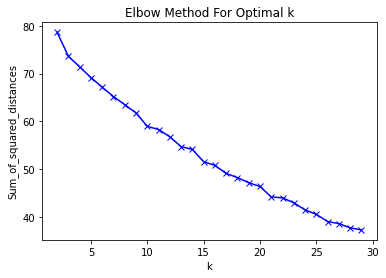

In [127]:
### K-Means

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

K = range(2,30)

for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)

   km = km.fit(X)
    
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [130]:
n_cluster = 26

model = KMeans(n_clusters=n_cluster, init='k-means++', max_iter=200, n_init=10)

model.fit(X)

labels_19=model.labels_

### checking for words in cluster

In [154]:
from sklearn.cluster import KMeans

order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

for i in range(n_cluster):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind])

Cluster 0:
 society
 committee
 ltd
 london
 guarantee
 youth
 city
 john
 company
 taken
 health
 street
 furniture
 maintaining
 co
 sufficient
 secretary
 education
 account
 trust
Cluster 1:
 families
 company
 directors
 family
 project
 lottery
 companies
 big
 group
 children
 supporting
 pension
 advice
 opportunities
 designated
 achieve
 movement
 training
 office
 new
Cluster 2:
 company
 partnership
 investments
 period
 trade
 companies
 recognised
 asset
 october
 amount
 services
 depreciation
 grants
 council
 transaction
 debtors
 initially
 frs
 allocated
 gains
Cluster 3:
 uk
 wales
 purchase
 hire
 mr
 office
 st
 published
 examiners
 generating
 day
 depreciation
 recruitment
 work
 voluntary
 cover
 major
 frs
 deficit
 surplus
Cluster 4:
 centre
 company
 companies
 directors
 mr
 community
 board
 incorporated
 commissioners
 accumulated
 grants
 generating
 trust
 england
 issued
 wales
 designated
 committee
 prior
 advice
Cluster 5:
 trust
 investments
 equi

In [132]:
df_19['sub_labels'] = list(labels_19)

<ipython-input-132-607d683e072a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19['sub_labels'] = list(labels_19)


In [133]:
df_19.head(2)

,filename,keys,text_best,labels,Dbscan,sub_labels
10,0268dc6137413c636f96016aef747700.pdf,address__post_town address__postcode address__...,registered company numbe registered charity nu...,19,"DBSCAN(eps=0.12, min_samples=1)",1
30,05112903f97b1498afe497845b659ad2.pdf,address__post_town address__postcode address__...,registered charity number trustees report audi...,19,"DBSCAN(eps=0.12, min_samples=1)",9


In [134]:
df_19.sub_labels.value_counts()

17    14
8     10
5      8
1      7
9      6
10     6
0      5
15     5
24     5
2      4
21     4
6      4
14     4
3      3
4      3
7      3
12     3
11     3
13     3
16     3
19     3
20     3
22     3
18     2
23     2
25     1
Name: sub_labels, dtype: int64

Cluster: 0


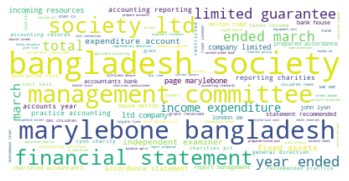

Cluster: 1


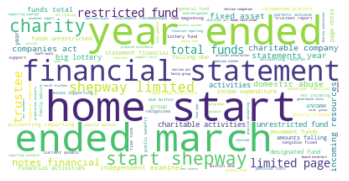

Cluster: 2


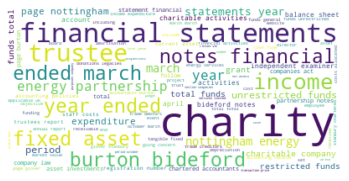

Cluster: 3


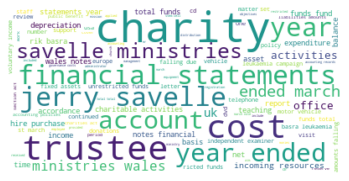

Cluster: 4


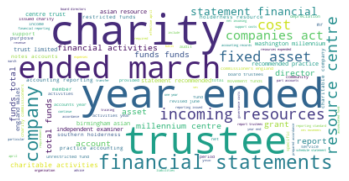

Cluster: 5


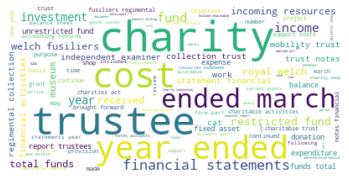

Cluster: 6


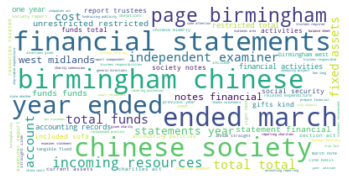

Cluster: 7


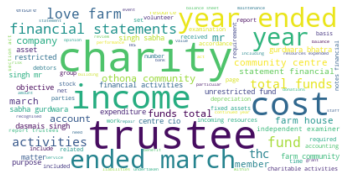

Cluster: 8


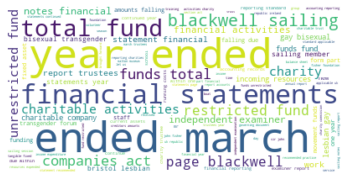

Cluster: 9


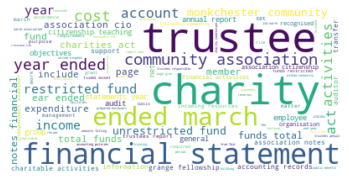

Cluster: 10


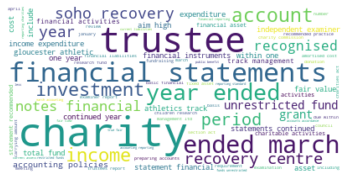

Cluster: 11


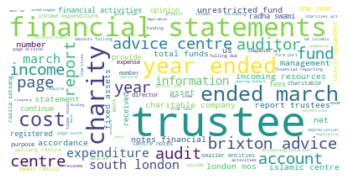

Cluster: 12


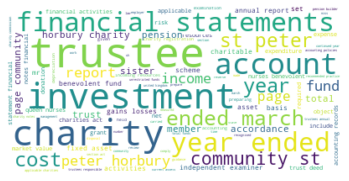

Cluster: 13


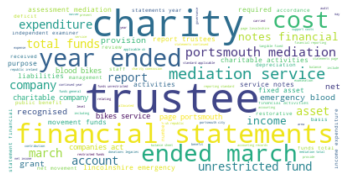

Cluster: 14


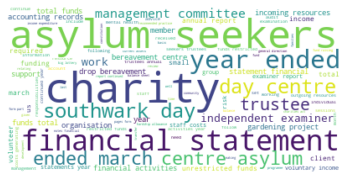

Cluster: 15


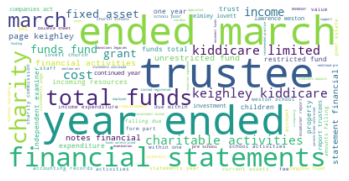

Cluster: 16


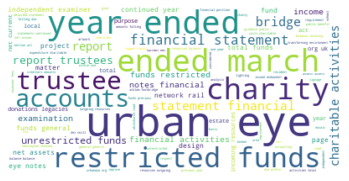

Cluster: 17


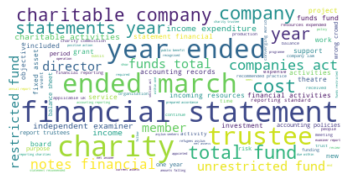

Cluster: 18


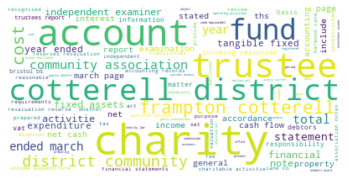

Cluster: 19


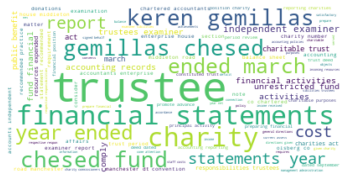

Cluster: 20


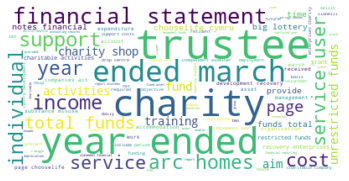

Cluster: 21


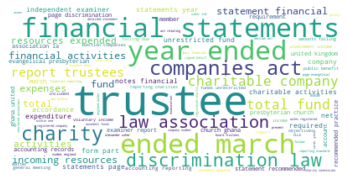

Cluster: 22


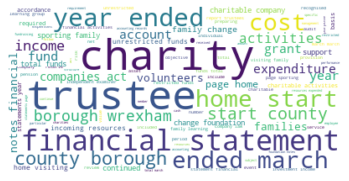

Cluster: 23


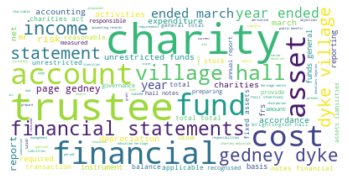

Cluster: 24


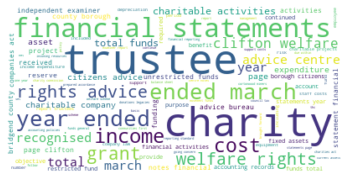

Cluster: 25


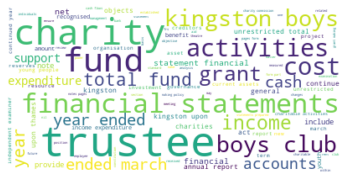

In [136]:
### plotting wordcloud for the subset

from wordcloud import WordCloud

result={'cluster':labels_19,'key':df_19.text_best}

result=pd.DataFrame(result)

for k in range(0,n_cluster):
   s=result[result.cluster==k]
   text=s['key'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   #print('Titles')
   #titles=charity[charity.cluster==k]['title']         
   #print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [193]:
### making subset from subsets 

check = df_19[df_19.sub_labels == 17]

check

,filename,keys,text_best,labels,Dbscan,sub_labels
95,0d05ab2165695833551f498207909c8a.pdf,address__post_town address__postcode address__...,registered company number england wales regist...,19,"DBSCAN(eps=0.12, min_samples=1)",17
263,245a58aa3f5897c68147e231f238401b.pdf,address__post_town address__postcode address__...,registered company numseeu ensland wales regis...,19,"DBSCAN(eps=0.12, min_samples=1)",17
326,2e4c972e9aead8cda27dc7d16fade56d.pdf,address__post_town address__postcode address__...,company number charity number converging world...,19,"DBSCAN(eps=0.12, min_samples=1)",17
336,2fafe7d9873d390b658e8f603f5f6e0d.pdf,address__post_town address__postcode address__...,salaam educational trust registered number yea...,19,"DBSCAN(eps=0.12, min_samples=1)",17
391,3651de56f7ac79b7591373039e2b9965.pdf,address__post_town address__postcode address__...,registered number pluto productions company li...,19,"DBSCAN(eps=0.12, min_samples=1)",17
649,5a90015930fef33f226b8b3df7691822.pdf,address__post_town address__postcode address__...,positive action refugees asylum seekers report...,19,"DBSCAN(eps=0.12, min_samples=1)",17
762,6c86d26231983c1b95308ea62a04906e.pdf,address__post_town address__postcode address__...,company registration number charity registrati...,19,"DBSCAN(eps=0.12, min_samples=1)",17
1008,917131b4fec4bd8d178ee95b26009a99.pdf,address__post_town address__postcode address__...,charity number company registration number eng...,19,"DBSCAN(eps=0.12, min_samples=1)",17
1016,92b98f83caa7a6555d414b5ccf417347.pdf,address__post_town address__postcode address__...,company registration number dial ride southern...,19,"DBSCAN(eps=0.12, min_samples=1)",17
1080,9b31b66db6948d0af929a968a2e062a4.pdf,address__post_town address__postcode address__...,forma arts media limited company limited guara...,19,"DBSCAN(eps=0.12, min_samples=1)",17


###  similar pdf in same labels entries 

In [207]:
check.iloc[6]['text_best']

'company registration number charity registration number women connect first report accounts march women connect first contents reference administration trustees report auditors report statement financial activities balance sheet notes financial statements women connect first report management board year ended march reference administration charity name women connect first charity registration number company registration number registered office neville street operational address riverside cardiff cf lp management board zobia zaman chair rajma begum alison kibblewhite allan herbert andrea heath resigned margaret mclaughlin appointed dr roiyah saltus hendrickson appointed senior management maria constanza mesa operational director maryann hale project manager amal beyrouty project manager mei lee finance officer menaka kodur senior administration officer bankers co operative bank business direct p box skelmersdale lancs wn wt auditors gordon partners temple court cathedral road cardiff 

In [208]:
check.iloc[7]['text_best']

'charity number company registration number england wales told idiot registered charity company limited guarantee unaudited trustees report financial statements year ended march told idiot contents year ended march page report trustees independent examiner report statement financial activities balance sheet notes financial statements told idiot trustees annual report year ended march trustees also directors charity purposes companies act present financial statements charity year ended march trustees adopted provisions accounting reporting charities statement recommended practice applicable charities preparing accounts accordance financial reporting standard applicable uk republic ireland frs effectiv january objectives activities object chanty established advance education public benefit promotion arts particular exclusively art drama principle activities company continued theatrical productions projects artist development education participation company mission statement follows told 

(-0.5, 799.5, 599.5, -0.5)

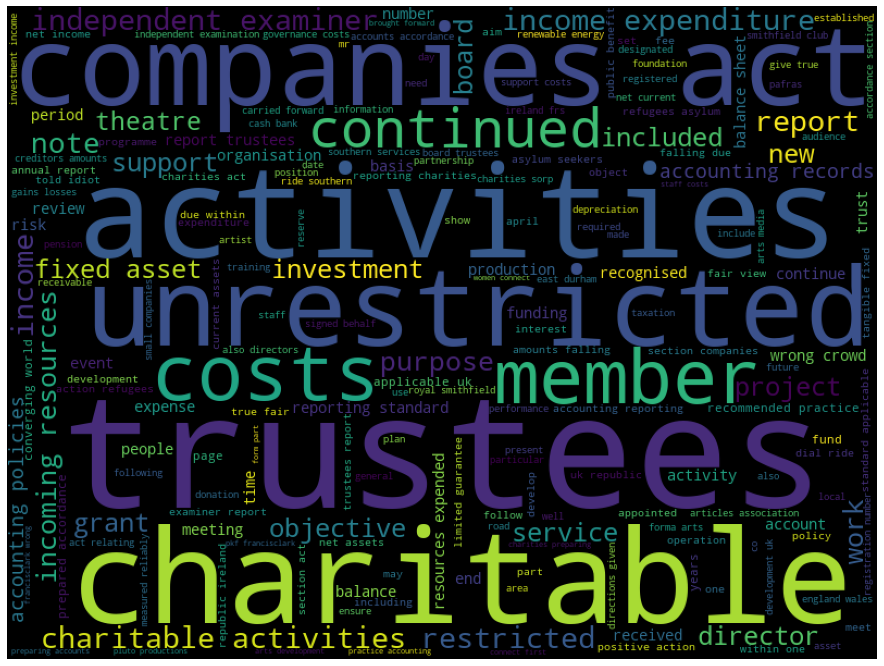

In [206]:
### plotting wordcloud with subset within subset

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import wordcloud

stop_words = stopwords.words('english')
stop_words.extend(['financial', 'statement', 'company', 'statements year', 'charity', 'year', 'ended', 'march', 'total', 'funds', 'statements', 'activites', 'trustee', 'cost'])

subjects = ' '.join( check['text_best'])

fig, ax = plt.subplots(figsize=(16, 12))

wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=stop_words).generate(subjects)
ax.imshow(wc)
ax.axis("off")